# VIIRS I-Band 375 m Active Fire Data | VNP14IMGML

#### Data Description:
https://www.earthdata.nasa.gov/learn/find-data/near-real-time/firms/viirs-i-band-375-m-active-fire-data

#### User Guide:
https://viirsland.gsfc.nasa.gov/PDF/VIIRS_activefire_User_Guide.pdf

In [1]:
# Import block
import os
import pandas as pd
import datetime
import numpy as np
import altair as alt
from vega_datasets import data

In [6]:
# Time conversion code.
# Source: https://stackoverflow.com/questions/62070759/how-to-convert-string-hhmm-to-time-in-python
def convert_string_to_time(str):
    if len(str) < 4:
        return datetime.time(hour=int(str[0]), minute=int(str[1:3]))
    else:
        return datetime.time(hour=int(str[0:2]), minute=int(str[2:4]))

In [23]:
# Test on one file.
pixel_data = pd.read_csv('VNP14IMGML/Extract/VNP14IMGML.201701.C1.05.txt/VNP14IMGML.201701.C1.05.txt', skipinitialspace=True)
px_filtered = pixel_data.query('-34 < Lat < 6 and -74 < Lon < -34')
px_filtered

,YYYYMMDD,HHMM,sat,Line,Sample,Lat,Lon,T4,T5,MeanT4,...,WinS,Confidence,DNFlag,SZA,SAA,VZA,VAA,Glint,Type,PixArea
3774,20170101,306,VNP,6026,1316,-9.063882,-36.035336,303.35,291.24,291.83,...,10,nominal,night,146.19,161.62,52.04,100.38,136.23,0,0.330
3775,20170101,306,VNP,6134,1309,-9.425350,-36.166191,300.22,288.37,284.99,...,10,nominal,night,145.88,161.96,52.21,100.00,135.70,0,0.333
3776,20170101,312,VNP,1332,297,-14.034520,-41.737049,320.08,289.76,0.00,...,0,nominal,night,142.56,171.35,65.59,102.12,121.63,0,0.414
3777,20170101,312,VNP,2222,1014,-17.492617,-39.476997,336.96,291.50,0.00,...,0,nominal,night,138.74,168.56,56.14,102.17,129.66,0,0.209
3778,20170101,312,VNP,2222,1015,-17.493326,-39.473587,331.60,291.61,0.00,...,0,nominal,night,138.74,168.56,56.13,102.17,129.67,0,0.209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505767,20170131,1936,VNP,4368,21,-33.759415,-70.608871,367.00,315.50,0.00,...,0,high,day,40.26,-76.09,69.96,-110.65,103.80,0,0.603
1505768,20170131,1936,VNP,4369,21,-33.752319,-70.611504,367.00,308.55,0.00,...,0,high,day,40.25,-76.10,69.96,-110.68,103.79,0,0.603
1505769,20170131,1936,VNP,4369,22,-33.753616,-70.615608,367.00,305.95,0.00,...,0,high,day,40.25,-76.09,69.95,-110.68,103.77,0,0.602
1505773,20170131,1936,VNP,4399,41,-33.718849,-70.808937,367.00,301.26,0.00,...,0,high,day,40.09,-75.99,69.64,-110.49,103.39,0,0.585


In [25]:
# File location
f_loc = 'VNP14IMGML\Extract'
f_loc2 = 'VNP14IMGML_Filtered'

# Load all files
for subdir, dirs, files in os.walk(f_loc):
    for file in files:
        pixel_data = pd.read_csv(os.path.join(subdir, file), skipinitialspace=True)
        # Constrain to only points within a rough bounding box of Brazil.
        px_filtered = pixel_data.query('-34 < Lat < 6 and -74 < Lon < -34')
        px_filtered.to_csv(os.path.join(f_loc2, file))

<ipython-input-25-ec6209f3459d>:8: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  pixel_data = pd.read_csv(os.path.join(subdir, file), skipinitialspace=True)
<ipython-input-25-ec6209f3459d>:8: DtypeWarning: Columns (15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  pixel_data = pd.read_csv(os.path.join(subdir, file), skipinitialspace=True)
<ipython-input-25-ec6209f3459d>:8: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  pixel_data = pd.read_csv(os.path.join(subdir, file), skipinitialspace=True)
<ipython-input-25-ec6209f3459d>:8: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  pixel_data = pd.read_csv(os.path.join(subdir, file), skipinitialspace=True)
<ipython-input-25-ec6209f3459d>:8: DtypeWarning: Columns (15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  

In [27]:
# Examine a sample of the filtered data
px_filtered = pd.read_csv(f_loc2 + '/' + 'VNP14IMGML.202107.C1.05.txt')
px_filtered

,Unnamed: 0,YYYYMMDD,HHMM,sat,Line,Sample,Lat,Lon,T4,T5,...,WinS,Confidence,DNFlag,SZA,SAA,VZA,VAA,Glint,Type,PixArea
0,5262,20210701,318,VNP,5627,618,-6.797390,-41.193375,314.59,288.41,...,10,nominal,night,161.70,26.14,61.14,99.82,122.38,0,0.294
1,5263,20210701,318,VNP,5627,619,-6.798092,-41.189392,316.83,287.89,...,10,nominal,night,161.70,26.15,61.13,99.82,122.39,0,0.294
2,5264,20210701,318,VNP,5641,620,-6.795644,-41.191170,319.72,288.40,...,10,nominal,night,161.70,26.16,61.11,100.42,122.22,0,0.293
3,5265,20210701,318,VNP,5642,620,-6.801480,-41.192467,306.95,287.30,...,10,nominal,night,161.70,26.17,61.11,100.39,122.23,0,0.293
4,5266,20210701,318,VNP,6161,1105,-8.804907,-39.847763,330.25,289.35,...,0,nominal,night,162.73,32.99,55.00,100.23,129.92,3,0.196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179213,2737081,20210731,1818,VNP,3182,3186,-3.859773,-73.342796,328.58,296.01,...,10,nominal,day,29.69,-41.76,0.42,-99.47,29.92,0,0.138
179214,2737085,20210731,1818,VNP,3229,3128,-3.675088,-73.173233,330.92,293.66,...,10,nominal,day,29.67,-42.22,2.22,-110.13,30.57,3,0.139
179215,2737086,20210731,1818,VNP,3278,3063,-3.481632,-72.987717,335.71,295.00,...,10,nominal,day,29.67,-42.72,4.14,-98.80,32.14,3,0.139
179216,2737113,20210731,1818,VNP,5503,2801,3.931241,-73.689690,332.91,289.09,...,10,nominal,day,24.54,-53.26,12.10,-101.01,33.81,2,0.147


In [28]:
# Try to bring all of the pixelwise data into memory.
f_loc2 = 'VNP14IMGML_Filtered'
px_list = []

# Load all files
for subdir, dirs, files in os.walk(f_loc2):
    for file in files:
        pixel_data = pd.read_csv(os.path.join(subdir, file), skipinitialspace=True)
        px_list.append(pixel_data)

In [31]:
# Create combined DataFrame.
px_combined = pd.concat(px_list)

# Erase px_list to save memory.
px_list = []

# Save output.
px_combined.to_csv('pixel_data_filtered.csv')

In [3]:
# Load saved data back into memory.
px_combined = pd.read_csv('pixel_data_filtered.csv')

In [4]:
# Examine data.
px_combined.Type.value_counts()

0    10253676
3      224437
2       98905
1        2498
Name: Type, dtype: int64

In [8]:
# Fix date and time formatting.
px_combined['Date'] = pd.to_datetime(px_combined['YYYYMMDD'].astype(str))
px_combined['Time'] = px_combined['HHMM'].astype(str).map(convert_string_to_time)

In [9]:
# Gather ranges to plot heatmap
min_lat = px_combined['Lat'].min()
max_lat = px_combined['Lat'].max() + 0.00000001
min_lon = px_combined['Lon'].min()
max_lon = px_combined['Lon'].max() + 0.00000001
lat_bins = np.linspace(min_lat, max_lat, 51)
lon_bins = np.linspace(min_lon, max_lon, 51)

In [10]:
max_lon

-34.075114989999996

In [11]:
# Test for one square of grid.
x,y = 0,0
px_combined[(px_combined['Lat'] >= lat_bins[x]) & (px_combined['Lat'] < lat_bins[x+1])
            & (px_combined['Lon'] >= lon_bins[y]) & (px_combined['Lon'] < lon_bins[y+1])
           ]['sat'].count()

0

In [12]:
# Calculate 2D histogram.
xy_distro = [px_combined[(px_combined['Lat'] >= lat_bins[x]) & (px_combined['Lat'] < lat_bins[x+1])
            & (px_combined['Lon'] >= lon_bins[y]) & (px_combined['Lon'] < lon_bins[y+1])
           ]['sat'].count() for x in range(0,50) for y in range(0,50)]

In [13]:
# Convert values to DataFrame.
xy_grid = pd.DataFrame([(lat_bins[x],lon_bins[y]) for x in range(0,50) for y in range(0,50)], columns = ['x','y'])
xy_grid['val'] = xy_distro
xy_grid

,x,y,val
0,-33.999996,-73.999992,0
1,-33.999996,-73.201494,0
2,-33.999996,-72.402997,488
3,-33.999996,-71.604499,3057
4,-33.999996,-70.806002,3105
...,...,...,...
2495,5.199999,-38.067603,0
2496,5.199999,-37.269105,0
2497,5.199999,-36.470608,0
2498,5.199999,-35.672110,0


In [14]:
xy_grid[xy_grid['val'] > 40000]

,x,y,val
1016,-17.999998,-61.224031,41514
1068,-17.199998,-59.627036,52723
1115,-16.399998,-62.022529,68687
1116,-16.399998,-61.224031,46560
1512,-9.999999,-64.418022,48371
1623,-8.399999,-55.634549,44815
1929,-3.600000,-50.843563,42519


In [15]:
# Plot 2D histogram as heatmap.
heat_map = alt.Chart(xy_grid).mark_rect().encode(
    alt.X('x:O', title = 'Latitude', axis=alt.Axis(format='.3f')),
    alt.Y('y:O', title = 'Longitude', axis=alt.Axis(format='.3f')),
    alt.Color('val:Q', title = 'Frequency')
).properties(height=600, width=600)
#geo = alt.Chart(alt.topo_feature('south_america.json','countries')).mark_geoshape(fill='white',stroke='black')

heat_map

alt.Chart(...)

In [16]:
world = data.world_110m.url

bg = alt.Chart(alt.topo_feature(world, 'countries')).mark_geoshape(
    fill='#2a1d0c', stroke='#706545', strokeWidth=0.5
).project(
    type='mercator')

h = alt.Chart(xy_grid).encode(
    longitude='y:Q',
    latitude='x:Q',
).mark_point().encode(
    alt.Color('val:Q', title = 'Frequency'),
).properties()

(bg + h)

alt.LayerChart(...)

### Feature Histograms

In [17]:
px_combined

,Unnamed: 0.1,Unnamed: 0,YYYYMMDD,HHMM,sat,Line,Sample,Lat,Lon,T4,...,DNFlag,SZA,SAA,VZA,VAA,Glint,Type,PixArea,Date,Time
0,0,3774,20170101,306,VNP,6026,1316,-9.063882,-36.035336,303.35,...,night,146.19,161.62,52.04,100.38,136.23,0,0.330,2017-01-01,03:06:00
1,1,3775,20170101,306,VNP,6134,1309,-9.425350,-36.166191,300.22,...,night,145.88,161.96,52.21,100.00,135.70,0,0.333,2017-01-01,03:06:00
2,2,3776,20170101,312,VNP,1332,297,-14.034520,-41.737049,320.08,...,night,142.56,171.35,65.59,102.12,121.63,0,0.414,2017-01-01,03:12:00
3,3,3777,20170101,312,VNP,2222,1014,-17.492617,-39.476997,336.96,...,night,138.74,168.56,56.14,102.17,129.66,0,0.209,2017-01-01,03:12:00
4,4,3778,20170101,312,VNP,2222,1015,-17.493326,-39.473587,331.60,...,night,138.74,168.56,56.13,102.17,129.67,0,0.209,2017-01-01,03:12:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10579511,77261,1303889,20211231,1854,VNP,1159,384,4.439043,-71.497459,333.76,...,day,41.22,-133.18,64.29,-97.74,99.05,0,0.375,2021-12-31,18:54:00
10579512,77262,1303890,20211231,1854,VNP,1275,126,5.085053,-70.106705,332.82,...,day,42.69,-132.52,68.07,-98.17,104.17,0,0.517,2021-12-31,18:54:00
10579513,77263,1303891,20211231,1854,VNP,1292,124,5.084149,-70.103867,331.45,...,day,42.70,-132.51,68.10,-97.69,104.03,0,0.518,2021-12-31,18:54:00
10579514,77264,1303892,20211231,1854,VNP,1400,115,5.482721,-70.118103,328.89,...,day,42.97,-132.82,68.24,-97.98,104.38,0,0.525,2021-12-31,18:54:00


<AxesSubplot:>

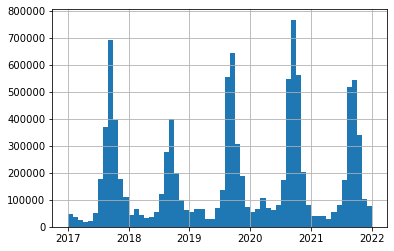

In [18]:
# Date histogram
px_combined['Date'].hist(bins = (60))

<AxesSubplot:>

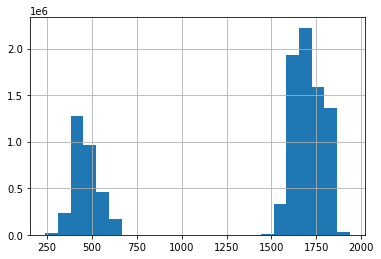

In [19]:
# Time histogram
px_combined['HHMM'].hist(bins=24)

In [20]:
# Satellite name
px_combined['sat'].value_counts()
# VNP stands for Suomi-NPP

VNP    10579516
Name: sat, dtype: int64

<AxesSubplot:>

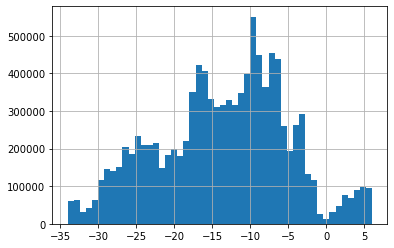

In [21]:
# Latitude histogram
px_combined['Lat'].hist(bins = 50)

<AxesSubplot:>

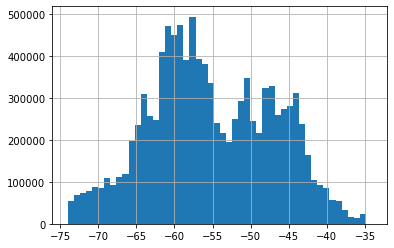

In [22]:
# Longitude histogram
px_combined['Lon'].hist(bins = 50)

<AxesSubplot:>

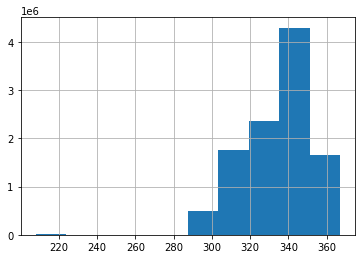

In [23]:
# Fire pixel brightness temperature on channel I4 (Kelvin)
px_combined['T4'].hist(bins = 10)

<AxesSubplot:>

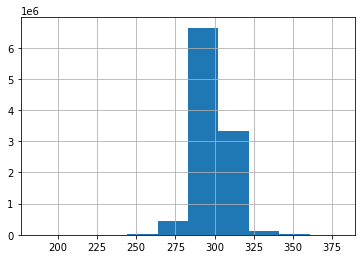

In [24]:
# Fire pixel brightness temperature on channel I5 (Kelvin)
px_combined['T5'].hist(bins = 10)

<AxesSubplot:>

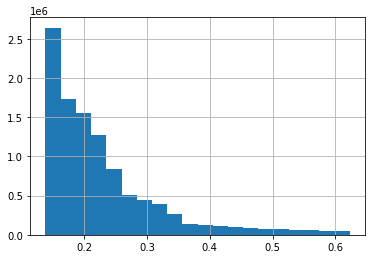

In [25]:
# Pixarea VIIRS I-band fire pixel area (km^2)
px_combined['PixArea'].hist(bins = 20)

In [26]:
px_combined.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'YYYYMMDD', 'HHMM', 'sat', 'Line',
       'Sample', 'Lat', 'Lon', 'T4', 'T5', 'MeanT4', 'MeanT5', 'MeanDT',
       'MADT4', 'MADT5', 'MADDT', 'FRP', 'Rad13', 'Mean13', 'AdjC', 'AdjW',
       'WinS', 'Confidence', 'DNFlag', 'SZA', 'SAA', 'VZA', 'VAA', 'Glint',
       'Type', 'PixArea', 'Date', 'Time'],
      dtype='object')

<AxesSubplot:>

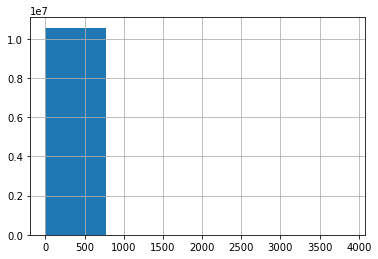

In [27]:
# Fire radiative power (MW)
px_combined['FRP'].hist(bins = 5)

In [28]:
# Examining massive outlier.
px_combined['FRP'].max()
# This is more energy than the Chernobyl plant used to put out.

3884.42

<AxesSubplot:>

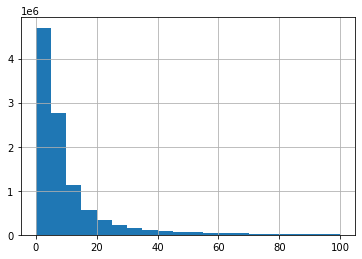

In [29]:
# Removing large outliers
px_combined[px_combined['FRP'] < 100]['FRP'].hist(bins = 20)

<AxesSubplot:>

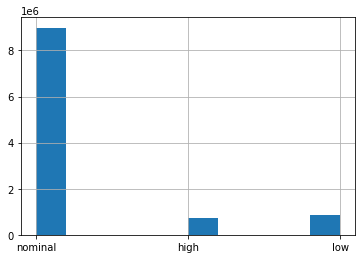

In [30]:
# Confidence
px_combined['Confidence'].hist()

<AxesSubplot:>

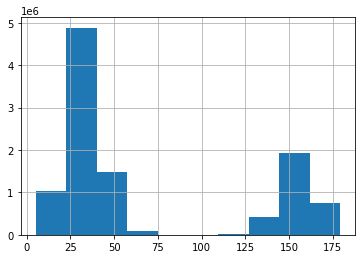

In [31]:
# Solar zenith angle
px_combined['SZA'].hist()

<AxesSubplot:>

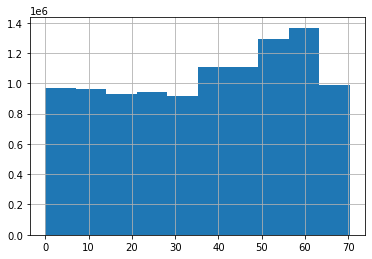

In [32]:
# View zenith angle
px_combined['VZA'].hist()

In [33]:
# Guide does not specify what this Type variable indicates.
px_combined['Type'].value_counts()

0    10253676
3      224437
2       98905
1        2498
Name: Type, dtype: int64

### Exploring pixels related to an individual detection in Matto Grosso.

In [34]:
test = px_combined[px_combined['Date'] == '7/4/2020']

In [35]:
test['HHMM'].value_counts()

1724    1462
1718    1227
454      529
448      431
1542     399
1548      72
1906      57
1900      30
306       28
630       24
312       16
1730       7
624        5
636        3
Name: HHMM, dtype: int64

In [36]:
test = test[test['HHMM'] == 1724][['Lat','Lon','Line','Sample']]
test

,Lat,Lon,Line,Sample
6214623,-20.549688,-43.766487,13,354
6214624,-23.619299,-61.444988,20,4448
6214625,-23.612003,-61.453957,22,4450
6214626,-23.091948,-57.614792,30,3604
6214627,-23.243757,-59.045345,44,3946
...,...,...,...,...
6216080,-1.553325,-56.051346,6339,1974
6216081,-1.553864,-56.054890,6339,1975
6216082,-1.355620,-55.657402,6378,1858
6216083,-1.368289,-55.848728,6382,1909


In [37]:
test['tool'] = test['Lat'].astype(str) + ' x ' + test['Lon'].astype(str)
test['tool2'] = test['Lat'].astype(str) + ' x ' + test['Lon'].astype(str) + ' | ' +  test['Line'].astype(str) + ' x ' + test['Sample'].astype(str)
test

,Lat,Lon,Line,Sample,tool,tool2
6214623,-20.549688,-43.766487,13,354,-20.549688 x -43.766487,-20.549688 x -43.766487 | 13 x 354
6214624,-23.619299,-61.444988,20,4448,-23.619299 x -61.444988,-23.619299 x -61.444988 | 20 x 4448
6214625,-23.612003,-61.453957,22,4450,-23.612003 x -61.453957,-23.612003 x -61.453957 | 22 x 4450
6214626,-23.091948,-57.614792,30,3604,-23.091948 x -57.614792,-23.091948 x -57.614792 | 30 x 3604
6214627,-23.243757,-59.045345,44,3946,-23.243757 x -59.045345,-23.243757 x -59.045345 | 44 x 3946
...,...,...,...,...,...,...
6216080,-1.553325,-56.051346,6339,1974,-1.553325 x -56.051346,-1.553325 x -56.051346 | 6339 x 1974
6216081,-1.553864,-56.054890,6339,1975,-1.553864 x -56.05489,-1.553864 x -56.05489 | 6339 x 1975
6216082,-1.355620,-55.657402,6378,1858,-1.35562 x -55.657402,-1.35562 x -55.657402 | 6378 x 1858
6216083,-1.368289,-55.848728,6382,1909,-1.368289 x -55.848728,-1.368289 x -55.848728 | 6382 x 1909


In [38]:
alt.Chart(test).mark_circle().encode(
    alt.X('Lat', title = 'Latitude', axis=alt.Axis(labels=False)),
    alt.Y('Lon', title = 'Longitude', axis=alt.Axis(labels=False)),
    tooltip = 'tool2'
).properties(height=600, width=600).interactive()

alt.Chart(...)

In [39]:
alt.Chart(test).mark_circle().encode(
    alt.X('Line', title = 'Line', axis=alt.Axis(labels=False), scale = alt.Scale(domain=[0,6400])),
    alt.Y('Sample', title = 'Sample', axis=alt.Axis(labels=False), scale = alt.Scale(domain=[0,6400])),
    tooltip = 'tool2'
).properties(height=600, width=600).interactive()

alt.Chart(...)

In [40]:
centroid_lat = -18.59
centroid_long = -57.51

In [53]:
jul_df = px_combined[(px_combined['Date'] >= '7/1/2020') & (px_combined['Date'] <= '7/15/2020')]

In [54]:
jul_df = jul_df[(jul_df['Lat'] >= centroid_lat - 1) & (jul_df['Lat'] <= centroid_lat + 1)]
jul_df = jul_df[(jul_df['Lon'] >= centroid_long - 1) & (jul_df['Lon'] <= centroid_long + 1)]
jul_df['tool'] = jul_df['Lat'].astype(str) + ' x ' + jul_df['Lon'].astype(str)
jul_df['tool2'] = jul_df['Lat'].astype(str) + ' x ' + jul_df['Lon'].astype(str) + ' | ' +  jul_df['Line'].astype(str) + ' x ' + jul_df['Sample'].astype(str)
jul_df

,Unnamed: 0.1,Unnamed: 0,YYYYMMDD,HHMM,sat,Line,Sample,Lat,Lon,T4,...,SAA,VZA,VAA,Glint,Type,PixArea,Date,Time,tool,tool2
6204054,917,53944,20200701,1636,VNP,5332,5703,-19.367140,-56.667320,329.46,...,-16.71,60.09,84.41,61.69,0,0.273,2020-07-01,16:36:00,-19.36714 x -56.66732,-19.36714 x -56.66732 | 5332 x 5703
6204056,919,53946,20200701,1636,VNP,5400,5819,-19.184547,-57.225445,353.82,...,-16.07,61.62,84.68,62.84,0,0.305,2020-07-01,16:36:00,-19.184547 x -57.225445,-19.184547 x -57.225445 | 5400 x 5819
6204057,920,53947,20200701,1636,VNP,5403,5797,-19.157442,-57.125633,340.27,...,-16.21,61.33,84.74,62.51,0,0.298,2020-07-01,16:36:00,-19.157442 x -57.125633,-19.157442 x -57.125633 | 5403 x 5797
6204058,921,53948,20200701,1636,VNP,5415,5817,-19.182560,-57.224033,348.77,...,-16.08,61.60,84.11,63.20,0,0.304,2020-07-01,16:36:00,-19.18256 x -57.224033,-19.18256 x -57.224033 | 5415 x 5817
6204059,922,53949,20200701,1636,VNP,5418,5795,-19.154791,-57.124371,341.75,...,-16.22,61.31,84.17,62.87,0,0.298,2020-07-01,16:36:00,-19.154791 x -57.124371,-19.154791 x -57.124371 | 5418 x 5795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249503,46366,856702,20200715,1718,VNP,1160,3688,-18.598824,-57.444874,331.91,...,-27.98,14.82,80.71,42.01,0,0.152,2020-07-15,17:18:00,-18.598824 x -57.444874,-18.598824 x -57.444874 | 1160 x 3688
6249574,46437,856773,20200715,1718,VNP,1327,3596,-18.002071,-57.214973,351.14,...,-28.58,12.01,81.44,41.58,0,0.147,2020-07-15,17:18:00,-18.002071 x -57.214973,-18.002071 x -57.214973 | 1327 x 3596
6249577,46440,856776,20200715,1718,VNP,1354,3614,-17.924803,-57.305077,339.96,...,-28.52,12.56,80.78,41.56,3,0.148,2020-07-15,17:18:00,-17.924803 x -57.305077,-17.924803 x -57.305077 | 1354 x 3614
6249581,46444,856780,20200715,1718,VNP,1380,3603,-17.834637,-57.283535,348.16,...,-28.60,12.23,79.93,41.70,0,0.147,2020-07-15,17:18:00,-17.834637 x -57.283535,-17.834637 x -57.283535 | 1380 x 3603


In [43]:
alt.Chart(jul_df[['Lat', 'Lon', 'Date', 'tool2']]).mark_circle(size=250).encode(
    alt.X('Lat', title = 'Lat', axis=alt.Axis(labels=False)),
    alt.Y('Lon', title = 'Lon', axis=alt.Axis(labels=False)),
    color = alt.Color('Date:N', scale=alt.Scale(scheme = 'category20')),
    tooltip = 'tool2'
).properties(height=600, width=600).interactive()

alt.Chart(...)

In [60]:
jul_df[(jul_df['Date'] == '2020-07-01') & (jul_df['Lat'] == -17.850826)]

,Unnamed: 0.1,Unnamed: 0,YYYYMMDD,HHMM,sat,Line,Sample,Lat,Lon,T4,...,SAA,VZA,VAA,Glint,Type,PixArea,Date,Time,tool,tool2
6204093,956,53983,20200701,1636,VNP,5813,5799,-17.850826,-57.363201,346.03,...,-16.42,61.35,84.34,62.35,0,0.299,2020-07-01,16:36:00,-17.850826 x -57.363201,-17.850826 x -57.363201 | 5813 x 5799


In [61]:
jul_df[(jul_df['Date'] == '2020-07-01') & (jul_df['Lat'] == -17.851263)]

,Unnamed: 0.1,Unnamed: 0,YYYYMMDD,HHMM,sat,Line,Sample,Lat,Lon,T4,...,SAA,VZA,VAA,Glint,Type,PixArea,Date,Time,tool,tool2
6204094,957,53984,20200701,1636,VNP,5813,5800,-17.851263,-57.367756,331.07,...,-16.41,61.36,84.34,62.36,0,0.299,2020-07-01,16:36:00,-17.851263 x -57.367756,-17.851263 x -57.367756 | 5813 x 5800


### Compare to other dataset

In [44]:
bdq = pd.read_csv('BDQ/Focos_2019-01-01_2019-12-31.csv')

In [45]:
bdq.satelite.value_counts()

NOAA-20      1305406
NPP-375      1014586
GOES-16       633107
NPP-375D      426124
AQUA_M-T      197632
NOAA-19       128112
TERRA_M-T      94194
METOP-B        65083
TERRA_M-M      54858
NOAA-18D       50667
AQUA_M-M       25260
MSG-03         17034
NOAA-19D       14161
NOAA-18        10353
NOAA-15         3401
METOP-C          373
NOAA-15D          81
Name: satelite, dtype: int64

In [46]:
px_combined[(px_combined['YYYYMMDD'] >= 20190101) & (px_combined['YYYYMMDD'] < 20200101)]

,Unnamed: 0.1,Unnamed: 0,YYYYMMDD,HHMM,sat,Line,Sample,Lat,Lon,T4,...,DNFlag,SZA,SAA,VZA,VAA,Glint,Type,PixArea,Date,Time
3552340,0,2865,20190101,318,VNP,4949,1034,-3.592151,-38.859043,338.86,...,night,151.31,158.61,55.86,99.20,133.99,2,0.206,2019-01-01,03:18:00
3552341,1,2866,20190101,318,VNP,4949,1033,-3.591609,-38.862331,319.10,...,night,151.31,158.61,55.87,99.20,133.98,2,0.206,2019-01-01,03:18:00
3552342,2,2867,20190101,318,VNP,4950,1034,-3.597454,-38.859932,316.47,...,night,151.30,158.61,55.86,99.17,133.97,3,0.206,2019-01-01,03:18:00
3552343,3,2868,20190101,318,VNP,5302,1350,-4.924172,-37.982002,304.40,...,night,149.72,157.84,51.25,99.24,138.20,0,0.316,2019-01-01,03:18:00
3552344,4,2869,20190101,318,VNP,5362,2001,-5.577782,-35.229156,315.28,...,night,147.99,153.86,36.80,99.11,149.57,3,0.168,2019-01-01,03:18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5768666,80370,1672230,20191231,1900,VNP,208,161,4.734637,-71.726097,327.62,...,day,42.25,-132.54,67.53,-97.91,103.19,0,0.493,2019-12-31,19:00:00
5768667,80371,1672231,20191231,1900,VNP,239,27,4.953388,-70.849487,346.65,...,day,43.05,-132.00,69.63,-97.78,105.94,0,0.597,2019-12-31,19:00:00
5768668,80372,1672232,20191231,1900,VNP,240,27,4.960622,-70.850403,335.85,...,day,43.05,-132.01,69.63,-97.82,105.96,0,0.597,2019-12-31,19:00:00
5768669,80373,1672233,20191231,1900,VNP,405,50,5.484005,-71.127014,327.37,...,day,43.23,-132.61,69.25,-97.87,105.55,0,0.577,2019-12-31,19:00:00


In [47]:
bdq_sub = bdq[bdq['datahora'] == '2019/12/25 15:42:00']
bdq_sub[(bdq_sub['latitude'] <= -6.33042) & (bdq_sub['latitude'] >= -6.53042)
      & (bdq_sub['longitude'] <= -40.9534) & (bdq_sub['longitude'] >= -41.13534)
       ]

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
3535942,2019/12/25 15:42:00,NPP-375,Brasil,PIAUI,PIMENTEIRAS,Caatinga,6.0,0.0,1.0,-6.52951,-41.04741,8.5
3535943,2019/12/25 15:42:00,NPP-375,Brasil,PIAUI,PIMENTEIRAS,Caatinga,6.0,0.0,1.0,-6.51875,-41.03534,82.7
3535944,2019/12/25 15:42:00,NPP-375,Brasil,PIAUI,PIMENTEIRAS,Caatinga,6.0,0.0,1.0,-6.51814,-41.03092,82.7
3535948,2019/12/25 15:42:00,NPP-375,Brasil,PIAUI,PIMENTEIRAS,Caatinga,6.0,0.0,1.0,-6.51753,-41.02652,33.8
3535949,2019/12/25 15:42:00,NPP-375,Brasil,PIAUI,PIMENTEIRAS,Caatinga,6.0,0.0,1.0,-6.51553,-41.04481,34.1
3535950,2019/12/25 15:42:00,NPP-375,Brasil,PIAUI,PIMENTEIRAS,Caatinga,6.0,0.0,1.0,-6.51492,-41.04039,34.1
3535951,2019/12/25 15:42:00,NPP-375,Brasil,PIAUI,PIMENTEIRAS,Caatinga,6.0,0.0,1.0,-6.51430,-41.03596,82.7
3535954,2019/12/25 15:42:00,NPP-375,Brasil,PIAUI,PIMENTEIRAS,Caatinga,6.0,0.0,1.0,-6.51369,-41.03154,82.7
3535955,2019/12/25 15:42:00,NPP-375,Brasil,PIAUI,PIMENTEIRAS,Caatinga,6.0,0.0,1.0,-6.51308,-41.02714,33.8
3535956,2019/12/25 15:42:00,NPP-375,Brasil,PIAUI,PIMENTEIRAS,Caatinga,6.0,0.0,1.0,-6.51108,-41.04543,101.2


In [48]:
px_sub = px_combined[(px_combined['Date'] >= '12/25/2019') & (px_combined['HHMM'] == 1542)]
px_sub_sub = px_sub[(px_sub['Lat'] <= -6.33042) & (px_sub['Lat'] >= -6.53042)
      & (px_sub['Lon'] <= -40.9534) & (px_sub['Lon'] >= -41.13534)
       ][['Lat','Lon','FRP','Line','Sample']]
px_sub_sub['tool2'] = px_sub_sub['Lat'].astype(str) + ' x ' + px_sub_sub['Lon'].astype(str) + ' | ' +  px_sub_sub['Line'].astype(str) + ' x ' + px_sub_sub['Sample'].astype(str)
px_sub_sub

,Lat,Lon,FRP,Line,Sample,tool2
5760001,-6.529508,-41.047413,8.48,5970,4776,-6.529508 x -41.047413 | 5970 x 4776
5760002,-6.517525,-41.026520,33.76,5972,4771,-6.517525 x -41.02652 | 5972 x 4771
5760003,-6.518138,-41.030922,82.67,5972,4772,-6.518138 x -41.030922 | 5972 x 4772
5760004,-6.518752,-41.035343,82.67,5972,4773,-6.518752 x -41.035343 | 5972 x 4773
5760005,-6.513081,-41.027142,33.76,5973,4771,-6.513081 x -41.027142 | 5973 x 4771
5760006,-6.513691,-41.031544,82.67,5973,4772,-6.513691 x -41.031544 | 5973 x 4772
5760007,-6.514918,-41.040386,34.10,5973,4774,-6.514918 x -41.040386 | 5973 x 4774
5760008,-6.515532,-41.044811,34.10,5973,4775,-6.515532 x -41.044811 | 5973 x 4775
5760009,-6.514305,-41.035965,82.67,5973,4773,-6.514305 x -41.035965 | 5973 x 4773
5760010,-6.509858,-41.036594,38.30,5974,4773,-6.509858 x -41.036594 | 5974 x 4773


In [49]:
alt.Chart(px_sub_sub).mark_circle(size=250).encode(
    alt.X('Line', title = 'Line', axis=alt.Axis(labels=False)),
    alt.Y('Sample', title = 'Sample', axis=alt.Axis(labels=False)),
    tooltip = 'tool2'
).properties(height=600, width=600).interactive()

alt.Chart(...)